<!-- HTML file automatically generated from DocOnce source (https://github.com/doconce/doconce/)
doconce format html exercisesweek38.do.txt  -->
<!-- dom:TITLE: Exercises week 38 -->

# Exercises week 38
**September 16-20, 2024**

Date: **Deadline is Friday September 20 at midnight**

## Overarching aims of the exercises this week

The aim of the exercises this week is to derive the equations for the bias-variance tradeoff to be used in project 1 as well as testing this for a simpler function using the bootstrap method. The exercises here can be reused in project 1 as well.

Consider a
dataset $\mathcal{L}$ consisting of the data
$\mathbf{X}_\mathcal{L}=\{(y_j, \boldsymbol{x}_j), j=0\ldots n-1\}$.

We assume that the true data is generated from a noisy model

$$
\boldsymbol{y}=f(\boldsymbol{x}) + \boldsymbol{\epsilon}.
$$

Here $\epsilon$ is normally distributed with mean zero and standard
deviation $\sigma^2$.

In our derivation of the ordinary least squares method we defined 
an approximation to the function $f$ in terms of the parameters
$\boldsymbol{\beta}$ and the design matrix $\boldsymbol{X}$ which embody our model,
that is $\boldsymbol{\tilde{y}}=\boldsymbol{X}\boldsymbol{\beta}$.

The parameters $\boldsymbol{\beta}$ are in turn found by optimizing the mean
squared error via the so-called cost function

$$
C(\boldsymbol{X},\boldsymbol{\beta}) =\frac{1}{n}\sum_{i=0}^{n-1}(y_i-\tilde{y}_i)^2=\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right].
$$

Here the expected value $\mathbb{E}$ is the sample value. 

Show that you can rewrite  this in terms of a term which contains the variance of the model itself (the so-called variance term), a
term which measures the deviation from the true data and the mean value of the model (the bias term) and finally the variance of the noise.
That is, show that

$$
\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right]=\mathrm{Bias}[\tilde{y}]+\mathrm{var}[\tilde{y}]+\sigma^2,
$$

with

$$
\mathrm{Bias}[\tilde{y}]=\mathbb{E}\left[\left(\boldsymbol{y}-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right]\right)^2\right],
$$

and

$$
\mathrm{var}[\tilde{y}]=\mathbb{E}\left[\left(\tilde{\boldsymbol{y}}-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right]\right)^2\right]=\frac{1}{n}\sum_i(\tilde{y}_i-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right])^2.
$$

Explain what the terms mean and discuss their interpretations.

Perform then a bias-variance analysis of a simple one-dimensional (or other models of your choice)  function by
studying the MSE value as function of the complexity of your model. Use ordinary least squares only.

Discuss the bias and variance trade-off as function
of your model complexity (the degree of the polynomial) and the number
of data points, and possibly also your training and test data using the **bootstrap** resampling method.
You can follow the code example in the jupyter-book at <https://compphysics.github.io/MachineLearning/doc/LectureNotes/_build/html/chapter3.html#the-bias-variance-tradeoff>.

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample
from sklearn.metrics import mean_squared_error

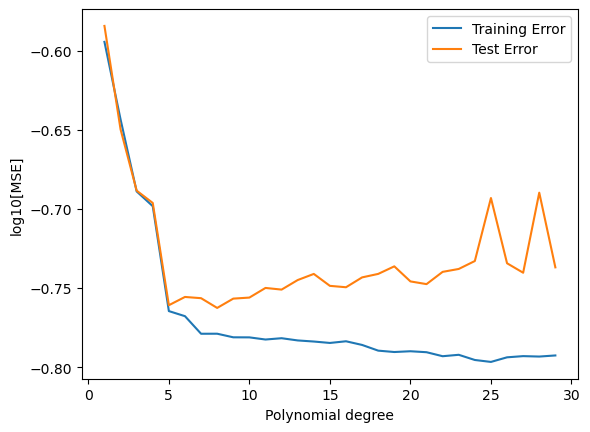

In [25]:
# code adapted from linked example, no radical difference
seed_num = 11111
np.random.seed(seed_num)

enable_prints = False

n = 500
n_boostraps = 100
degree = 30
noise = 0.4

# data set
x = np.linspace(-1, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2) + noise*np.random.normal(0, 1, x.shape)


Maxpolydegree = 30
X = np.zeros((len(y),Maxpolydegree))
X[:,0] = 1.0
testerror = np.zeros(Maxpolydegree)
trainingerror = np.zeros(Maxpolydegree)
polynomial = np.zeros(Maxpolydegree)

for polydegree in range(1, Maxpolydegree):
    polynomial[polydegree] = polydegree
    for degree in range(polydegree):
        X[:,degree] = x[:,0]**degree

    testerror[polydegree] = 0.0
    trainingerror[polydegree] = 0.0
    for samples in range(n_boostraps):
        x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        model = LinearRegression(fit_intercept=False).fit(x_train, y_train)
        ypred = model.predict(x_train)
        ytilde = model.predict(x_test)
        testerror[polydegree] += mean_squared_error(y_test, ytilde)
        trainingerror[polydegree] += mean_squared_error(y_train, ypred) 

    testerror[polydegree] /= n_boostraps
    trainingerror[polydegree] /= n_boostraps

    if enable_prints:
        print("Degree of polynomial: %3d"% polynomial[polydegree])
        print("Mean squared error on training data: %.8f" % trainingerror[polydegree])
        print("Mean squared error on test data: %.8f" % testerror[polydegree])

# exclude 0th datapoint which is uninsteresting anyway (0 degree polynomial, just fitting 1s) and causes division by zero errors in plotting
plt.plot(polynomial[1:], np.log10(trainingerror[1:]), label='Training Error')
plt.plot(polynomial[1:], np.log10(testerror[1:]), label='Test Error')

plt.xlabel('Polynomial degree')
plt.ylabel('log10[MSE]')
plt.legend()
plt.show()